In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('concrete_data.csv')
df

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Strength  
0               1040.0           676.0   28     79.99  
1               1055.0           676.0   28     61.89  
2                932.0           594.0  270     40.27  
3                932.0           594.0  365     41.05  
4                978.4           825.5  360     44.30  
...                ...             ...  ...       ...  
1025             870.1           768.3   28     44.28  
1026             817.9           813.4   28     31.18  
1027             892.4           780.0   28     23.70  
1028             989.6           788.9   28     32.77  
1029             864.5           761.5   28     32.40  

[1030 rows x 9 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

In [ ]:
x = df.drop('Strength',axis = 1)
y = df['Strength']

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in x.columns:
  x[col] = LabelEncoder().fit_transform(x[col])

lb = LabelEncoder()

In [ ]:
x

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0        277                   0        0     43                 5   
1        277                   0        0     43                 5   
2        220                  86        0    190                 0   
3        220                  86        0    190                 0   
4         96                  71        0    143                 0   
...      ...                 ...      ...    ...               ...   
1025     158                  51       24     99                48   
1026     211                   0       64    156                62   
1027      35                  82       54    144                23   
1028      62                 138        0     85                71   
1029     144                  37       10    164                45   

      Coarse Aggregate  Fine Aggregate  Age  
0                  221              37    4  
1                  235              37    4  
2                  110               0   11  
3                  110               0   13  
4                  170             235   12  
...                ...             ...  ...  
1025                55             146    4  
1026                 6             221    4  
1027                73             166    4  
1028               177             184    4  
1029                47             135    4  

[1030 rows x 8 columns]

In [ ]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(824, 8)
(824,)
(206, 8)
(206,)


In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

clfs = [LinearRegression(),Ridge(),Lasso()]

for i,clf in enumerate(clfs):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  mse = np.mean((y_test - y_pred) ** 2)
  print("Mean Squared Error:", mse)


Mean Squared Error: 74.11221145102759
Mean Squared Error: 74.10941413700942
Mean Squared Error: 73.55049720087979


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss= 'mean_squared_error')

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 20, epochs = 120,verbose = 0)


# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

score_mse_train = classifier.evaluate(x_train, y_train)
print('Train Score:', score_mse_train)
score_mse_test = classifier.evaluate(x_test, y_test)
print('Test Score:', score_mse_test)


26/26 [==============================] - 0s 3ms/step - loss: 69.1768
Train Score: 69.17675018310547
7/7 [==============================] - 0s 3ms/step - loss: 66.1797
Test Score: 66.17970275878906


In [3]:
import os
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\Drive/Task1.zip

Archive:  gdrive/MyDrive/Task1.zip
replace Training/female/131422.jpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
path = os.path.join('/content/Training')
male_path = os.path.join('/content/Training/male')
female_path = os.path.join('/content/Training/female')

In [6]:
images = os.listdir(path)

In [ ]:
print("The Number Of Female Pictures =",len(os.listdir(female_path)))
print("The Number Of Male Pictures =",len(os.listdir(male_path)))

The Number Of Female Pictures = 23243
The Number Of Male Pictures = 23766


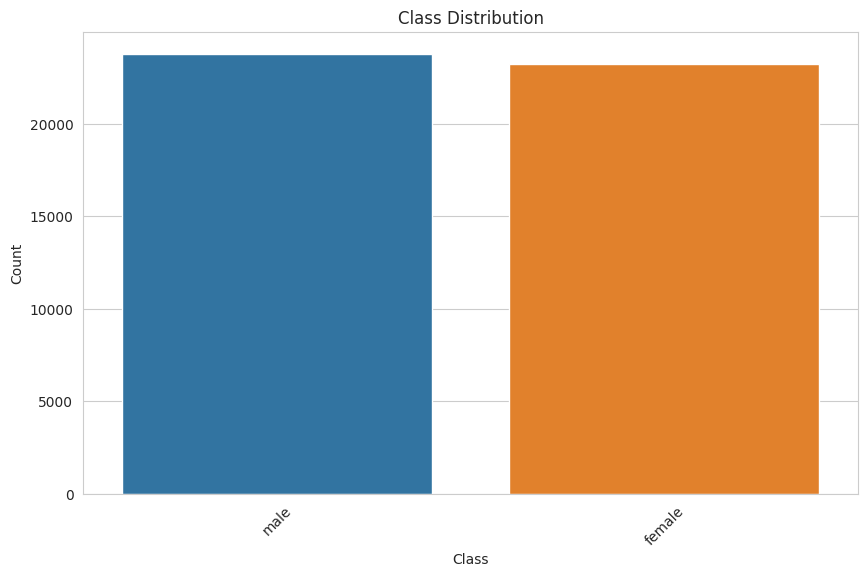

In [ ]:
classes = [len(os.listdir(os.path.join(path, Gender))) for Gender in images] #Used List Comprehension

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=images, y=classes)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

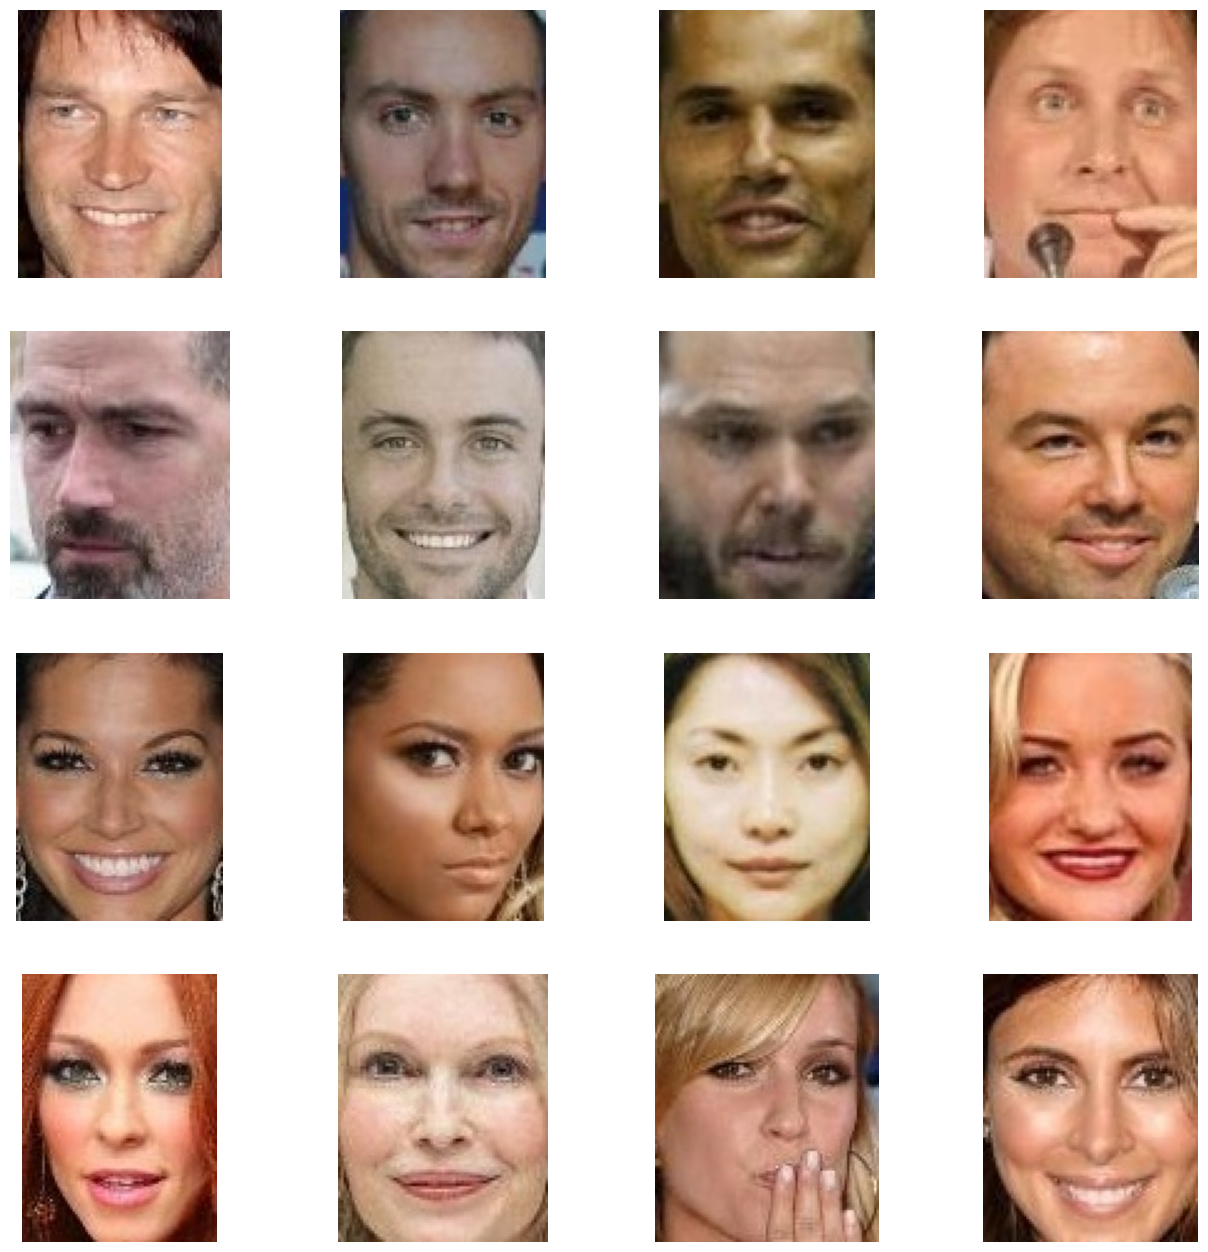

In [ ]:
rows = 4
cols = 4
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
index=5
index += 8
female_name = os.listdir(female_path)
male_name = os.listdir(male_path)
next_male_pic = [os.path.join(male_path, fname)
for fname in male_name[index-8:index]]
next_female_pic = [os.path.join(female_path, fname)
      for fname in female_name[index-8:index]]
for i, img_path in enumerate(next_male_pic+next_female_pic):
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(rows, cols, i + 1)
        sp.axis('Off') # Don't show axes (or gridlines)

        img = mpimg.imread(img_path)
        plt.imshow(img)
plt.show()

In [7]:
datagen = ImageDataGenerator(rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_generator = datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(48, 48),  # All images will be resized to 128 x 128
        batch_size=16,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 47009 images belonging to 2 classes.


In [8]:
X_all = np.concatenate([train_generator.next()[0] for _ in range(len(train_generator))])
y_all = train_generator.classes
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [9]:
X_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [10]:
svm_model = LinearSVC()
svm_model.fit(X_flattened, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
pred_train=svm_model.predict(X_flattened)
predsvm =svm_model.predict(X_test_flattened)


In [ ]:
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, predsvm)
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Test Accuracy: {accuracy_test:.2f}')

Training Accuracy: 0.51
Test Accuracy: 0.49


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',input_shape=(32,32,3), padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 32, 32, 256)       7168      
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 16, 16, 256)      0         
 ng2D)                                                           
                                                                 
 conv2d_101 (Conv2D)         (None, 16, 16, 128)       295040    
                                                                 
 max_pooling2d_101 (MaxPooli  (None, 8, 8, 128)        0         
 ng2D)                                                           
                                                                 
 conv2d_102 (Conv2D)         (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_102 (MaxPooli  (None, 4, 4, 64)       

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', learning_rate=0.001, metrics=['accuracy'])

In [71]:
history = model.fit( X_train,y_train,batch_size=16,steps_per_epoch=100, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
100/100 [==============================] - 61s 599ms/step - loss: 0.6946 - accuracy: 0.5150 - val_loss: 0.6930 - val_accuracy: 0.5088
Epoch 2/10
100/100 [==============================] - 73s 731ms/step - loss: 0.6921 - accuracy: 0.5319 - val_loss: 0.6939 - val_accuracy: 0.5088
Epoch 3/10
100/100 [==============================] - 70s 707ms/step - loss: 0.6925 - accuracy: 0.5225 - val_loss: 0.6936 - val_accuracy: 0.5088
Epoch 4/10
100/100 [==============================] - 64s 645ms/step - loss: 0.6937 - accuracy: 0.4956 - val_loss: 0.6933 - val_accuracy: 0.4912
Epoch 5/10
100/100 [==============================] - 76s 764ms/step - loss: 0.6927 - accuracy: 0.5219 - val_loss: 0.6943 - val_accuracy: 0.4912
Epoch 6/10
100/100 [==============================] - 61s 611ms/step - loss: 0.6937 - accuracy: 0.4925 - val_loss: 0.6934 - val_accuracy: 0.4912
Epoch 7/10
100/100 [==============================] - 64s 643ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6932 - val_ac

In [ ]:
history = model.fit(train_generator)